<a href="https://colab.research.google.com/github/salmanromeo/CS_5783_Machine_Learning_Fall_2022/blob/main/CS_5783_Fall_2022_Assignment_4_Naive_Bayes_Decision_Trees_kNNs/CS_5783_Fall_2022_Assignment_4_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 2**

#####Using the same housing data (Asssignment4_Data.xlsx), construct a decision tree classifier. You can use the implementation available on Sci-Kit Learn. Perform the following experiments and briefly (2-4 sentences) answer the questions.
1.   Use the default parameters.
> a. What is the accuracy on the training set?
> b. What is the accuracy on the test set?
2.   What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value.
1.   Why does restricting the depth have such a strong effect on the classifier performance?
2.   Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace the path taken towards classification) and provide a classification for the following example:

In [70]:
from tabulate import tabulate

In [71]:
mydata = [["Local Price", 9.0384], ["Bathrooms", 1], ["Land Area", 7.8], ["Living Area", 1.5], ["Garages", 1.5], ["Rooms", 7], ["Bedrooms", 3], ["Age of Home", 23]]

# Create table
print(tabulate(mydata, tablefmt="grid", numalign="center"))

+-------------+--------+
| Local Price | 9.0384 |
+-------------+--------+
| Bathrooms   |   1    |
+-------------+--------+
| Land Area   |  7.8   |
+-------------+--------+
| Living Area |  1.5   |
+-------------+--------+
| Garages     |  1.5   |
+-------------+--------+
| Rooms       |   7    |
+-------------+--------+
| Bedrooms    |   3    |
+-------------+--------+
| Age of Home |   23   |
+-------------+--------+


**Answer 2**

**Libraries**

In [94]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree

**Loading Data**

In [95]:
housing_data = pd.ExcelFile("/content/drive/MyDrive/Asssignment4_Data.xlsx")
train_df = pd.read_excel(housing_data, 'Train', index_col = 'House ID')
test_df = pd.read_excel(housing_data, 'Test', index_col = 'House ID')

**Training and Test Data Generation**

In [96]:
train_df['Class'] = train_df['Construction type'].map({'Apartment':0,'Condo':1,'House':2}) 
test_df['Class']  = test_df['Construction type'].map({'Apartment':0,'Condo':1,'House':2})

# The first 8 columns are feature and the class column is the target value
x_train = train_df.iloc[:,:8] 
y_train = train_df['Class']

x_test = test_df.iloc[:,:8]
y_test = test_df['Class']

**Training the decision tree using default parameter**

In [97]:
model = tree.DecisionTreeClassifier() 
model.fit(x_train, y_train)

DecisionTreeClassifier()

**2.1a  The accuracy on the training set**

In [98]:
y_train_predict = model.predict(x_train)
accuracy_score(y_train, y_train_predict)*100

100.0

Accuracy on training data is 100%.

**2.1b The accuracy on the test set**

In [99]:
y_test_predict=model.predict(x_test)
accuracy_score(y_test, y_test_predict)*100

40.0

Accuracy on test data is 40%.

**2.2 & 2.3 The effect of restricting the maximum depth of the tree on the classifier performance**

In [100]:
for i in range(1,11):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_predict)*100
    print('Accuracy for Train data: '+str(train_acc)+' for depth '+str(i))
    y_test_predict = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_predict)*100
    print('Accuracy for Test data: '+str(test_acc)+' for depth '+str(i))

Accuracy for Train data: 55.00000000000001 for depth 1
Accuracy for Test data: 40.0 for depth 1
Accuracy for Train data: 70.0 for depth 2
Accuracy for Test data: 80.0 for depth 2
Accuracy for Train data: 80.0 for depth 3
Accuracy for Test data: 80.0 for depth 3
Accuracy for Train data: 95.0 for depth 4
Accuracy for Test data: 40.0 for depth 4
Accuracy for Train data: 100.0 for depth 5
Accuracy for Test data: 60.0 for depth 5
Accuracy for Train data: 100.0 for depth 6
Accuracy for Test data: 60.0 for depth 6
Accuracy for Train data: 100.0 for depth 7
Accuracy for Test data: 60.0 for depth 7
Accuracy for Train data: 100.0 for depth 8
Accuracy for Test data: 60.0 for depth 8
Accuracy for Train data: 100.0 for depth 9
Accuracy for Test data: 60.0 for depth 9
Accuracy for Train data: 100.0 for depth 10
Accuracy for Test data: 60.0 for depth 10


From the above result, we can say that the classifier achieves the highest accuracy for test data (80%) for maximum depth 2. The accuracy is minimum for depth 1. With the increament of the depth after 2, the accuracy decreases for the test data. The reason behind this is when we increase the depth of tree the tree overfit with training data, as a result, can not generalize the data. Therefore, it is necessary to restrict the depth. For this reason restricting the depth has such strong effect on classifier performance.

**2.4 Visualize the resulting tree**

[Text(0.6, 0.9, 'X[7] <= 36.0\nentropy = 1.581\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.4, 0.7, 'X[0] <= 8.411\nentropy = 1.371\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.3, 0.5, 'X[3] <= 1.432\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.2, 0.3, 'X[2] <= 6.55\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8, 0.7, 'X[7] <= 59.0\nentropy = 1.361\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.7, 0.5, 'X[0] <= 4.55\nentropy = 0.991\nsamples = 9\nvalue = [5, 4, 0]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.3, 'X[2] <= 5.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 2, 0]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.9, 0.1, 'entropy = 0

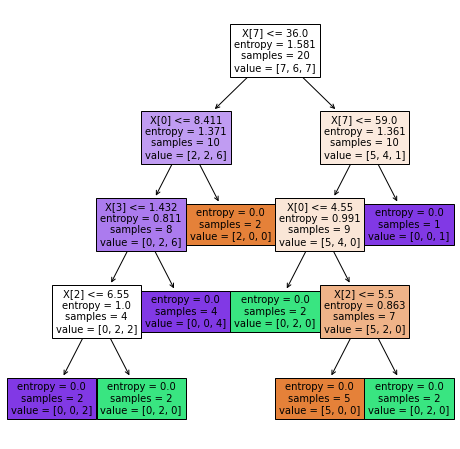

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
tree.plot_tree(model,filled=True)

**Classification for the following example**

In [102]:
example_data = {"Local Price": [9.0384], "Bathrooms": [1], "Land Area": [7.8], "Living area": [1.5], "# Garages": [1.5], "# Rooms": [7], "# Bedrooms": [3], "Age of home": [23]}
example = pd.DataFrame(example_data)
example

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,9.0384,1,7.8,1.5,1.5,7,3,23


In [103]:
y_example_predict = model.predict(example)
print("Predicted class for example data: "+str(y_example_predict))

Predicted class for example data: [0]


#####From this output, we can say that the construction type of the example will be Apartment as we define class 0 is for Apartment in Training and Test Data Generation section.
#####According to the tree, the age of home should be less than 36 and local price should be greater than 8.411. This satisfies the first condition of the example since age of home is 23 but it violates the second one as local price is 9.0384.
#####Therefore, based on the tree, it can be said that the construction type is Apartment.